<a href="https://colab.research.google.com/github/zacharyselk/Test-Project/blob/trunk/a_guide_to_any_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![title](NAT.png)

<h2><center><font color='green'>Introduction</font></center></h2>
<h1><center><font color='green' size="20px">Supervised Learning: Contd.</font></center></h1>
<br>

<h4><center>By: Cameron Hildebrandt - January 30th, 2021 - Lesson 2b</center></h4>

## Lets get started !!!

# When dealing with machine learning problems, there are generally two types of data (and machine learning models):
- Supervised data: always has one or multiple targets associated with it.
- Unsupervised data: does not have any target variable.

A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a supervised problem. Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be
supervised.

Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction

# Importing all the libraries needed

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

# Context

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [ ]:
df=pd.read_csv("/content/sample_data/heart.csv")
df.rename(columns={"output": "HeartDisease"}, inplace=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
df.dtypes

age               int64
sex               int64
cp                int64
trtbps            int64
chol              int64
fbs               int64
restecg           int64
thalachh          int64
exng              int64
oldpeak         float64
slp               int64
caa               int64
thall             int64
HeartDisease      int64
dtype: object

## Getting the categorical columns

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()

In [ ]:
num_col=df.columns.to_list()
print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'HeartDisease']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# The Attributess include:
- age - Age of the patient

- sex - Sex of the patient

- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

- trtbps - Resting blood pressure (in mm Hg)

- chol - Cholestoral in mg/dl fetched via BMI sensor

- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

- thalachh - Maximum heart rate achieved

- oldpeak - Previous peak

- slp - Slope

- caa - Number of major vessels

- thall - Thalium Stress Test result ~ (0,3)

- exng - Exercise induced angina ~ 1 = Yes, 0 = No

- HeartDisease: output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis

<img src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

## First Question should be why do we need this ??

Out Come of this phase is as given below :

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="HeartDisease",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="restecg",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

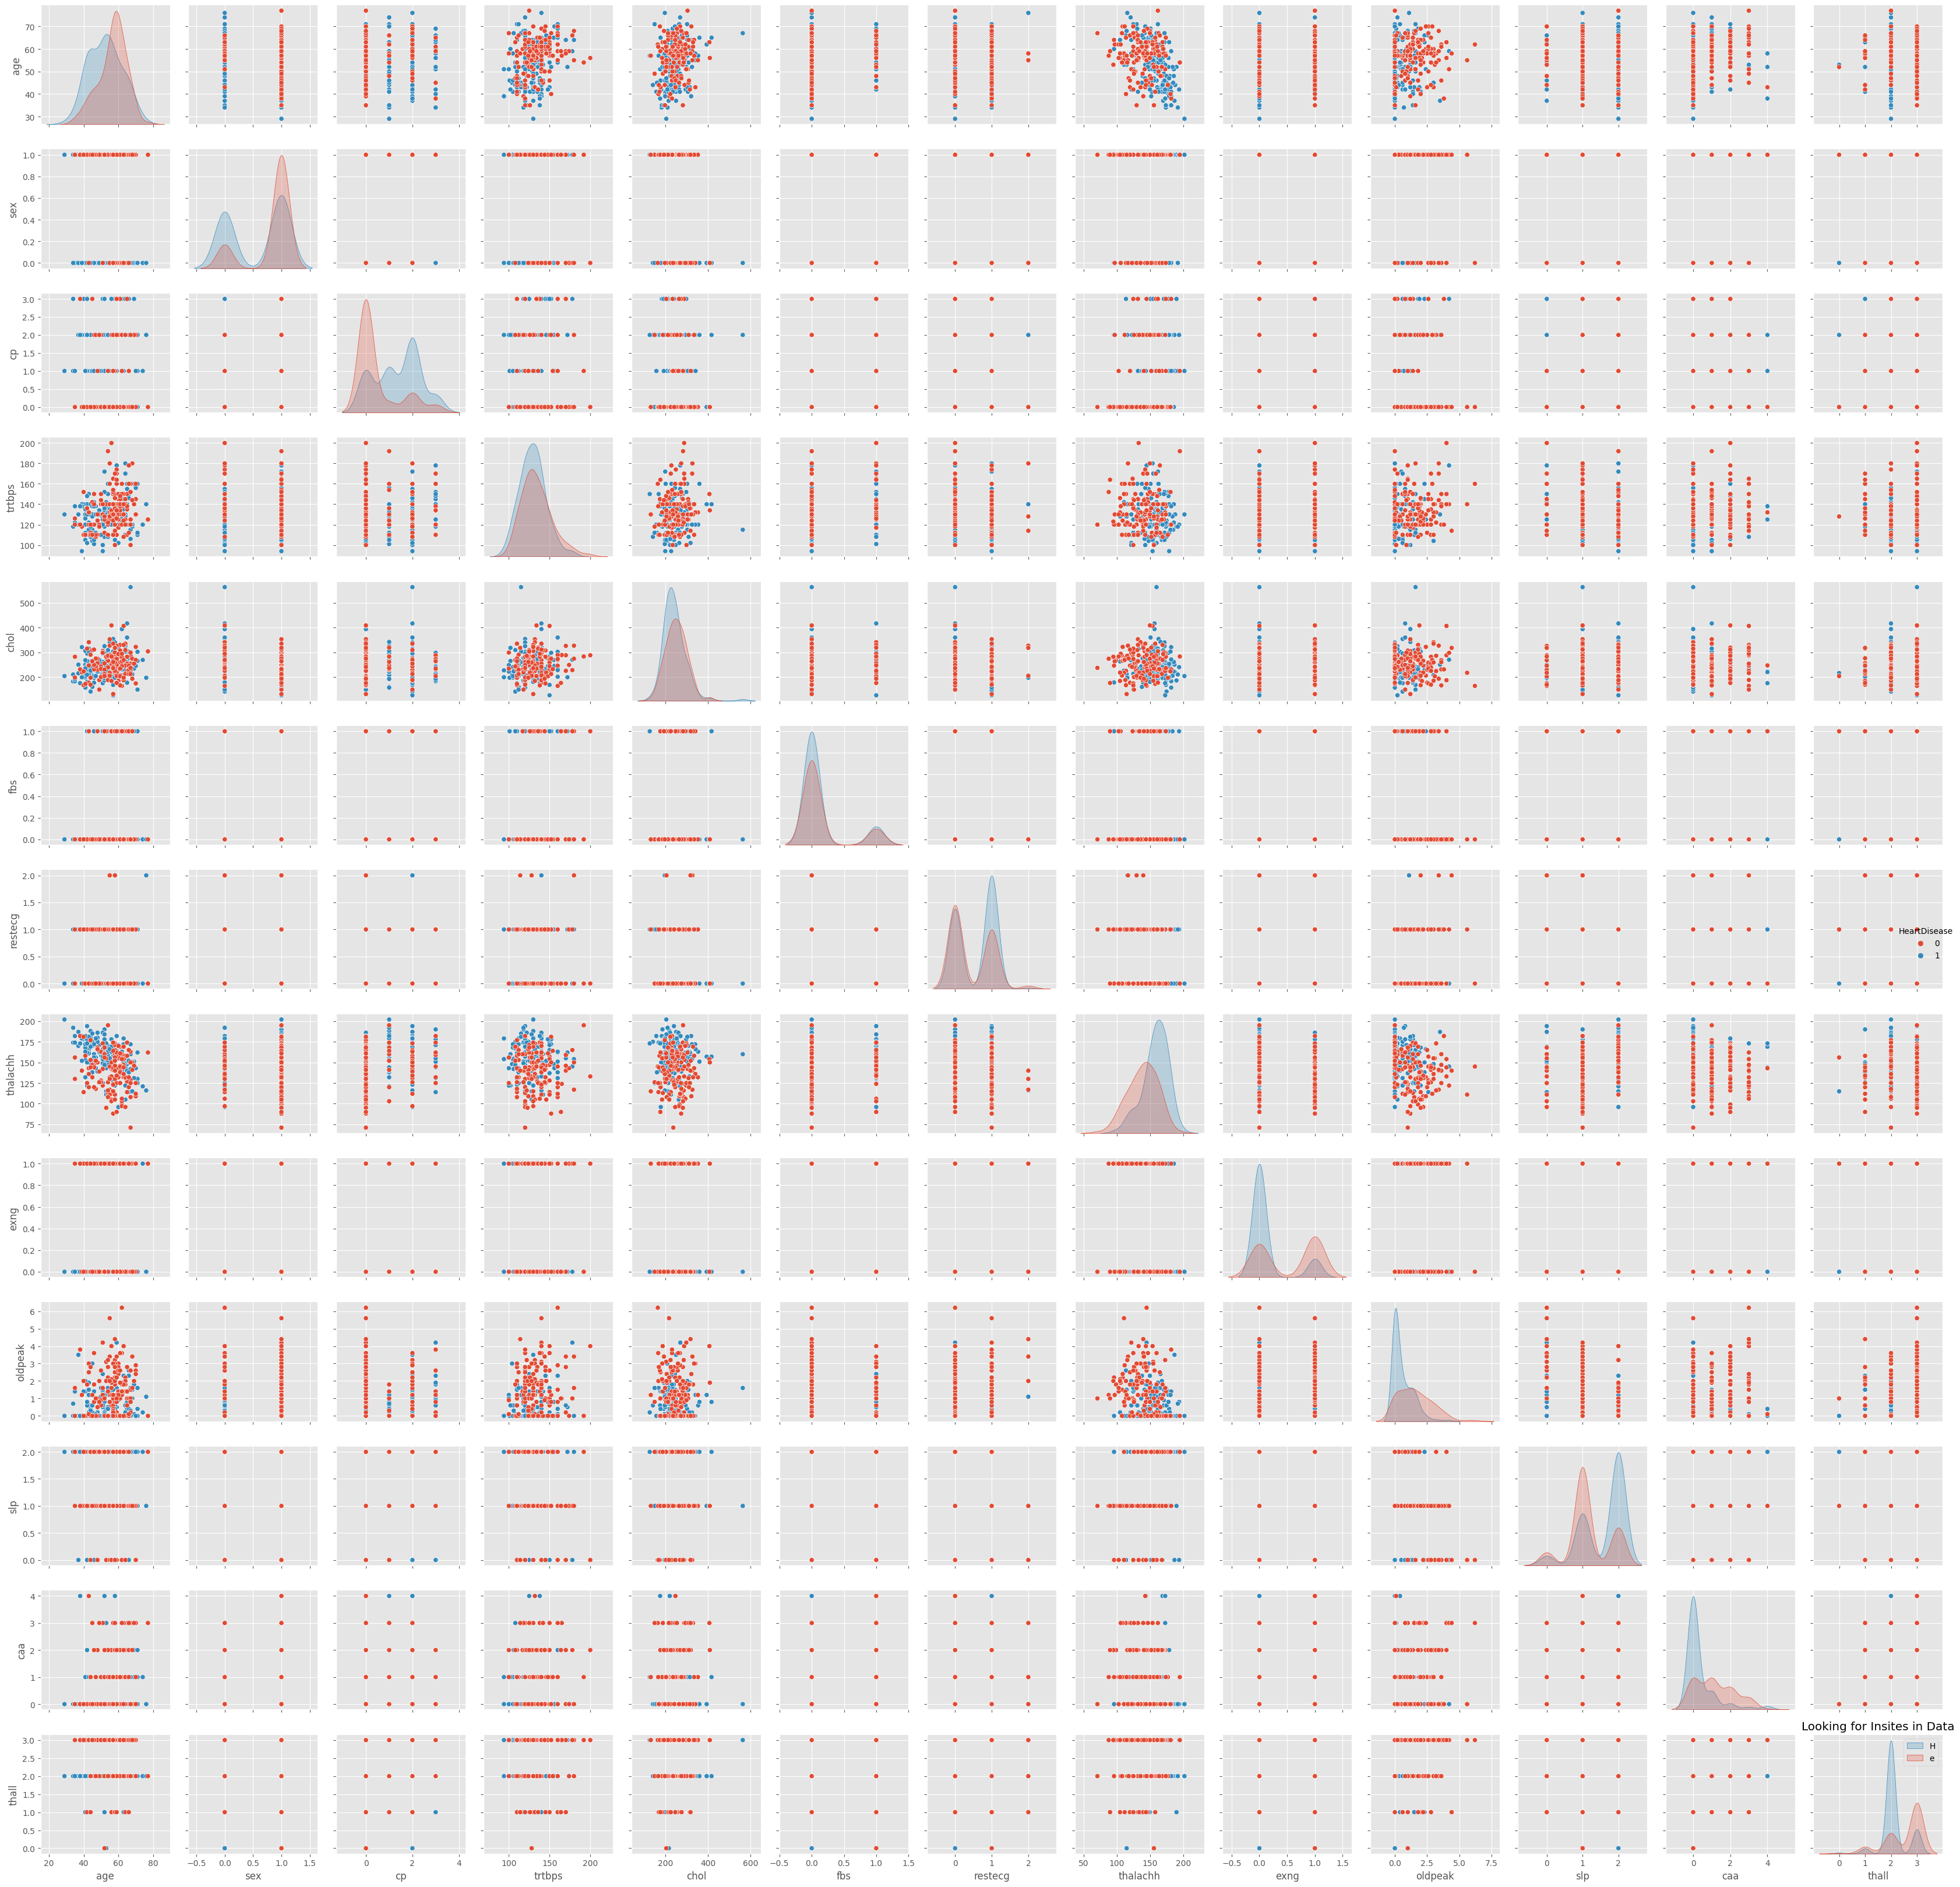

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

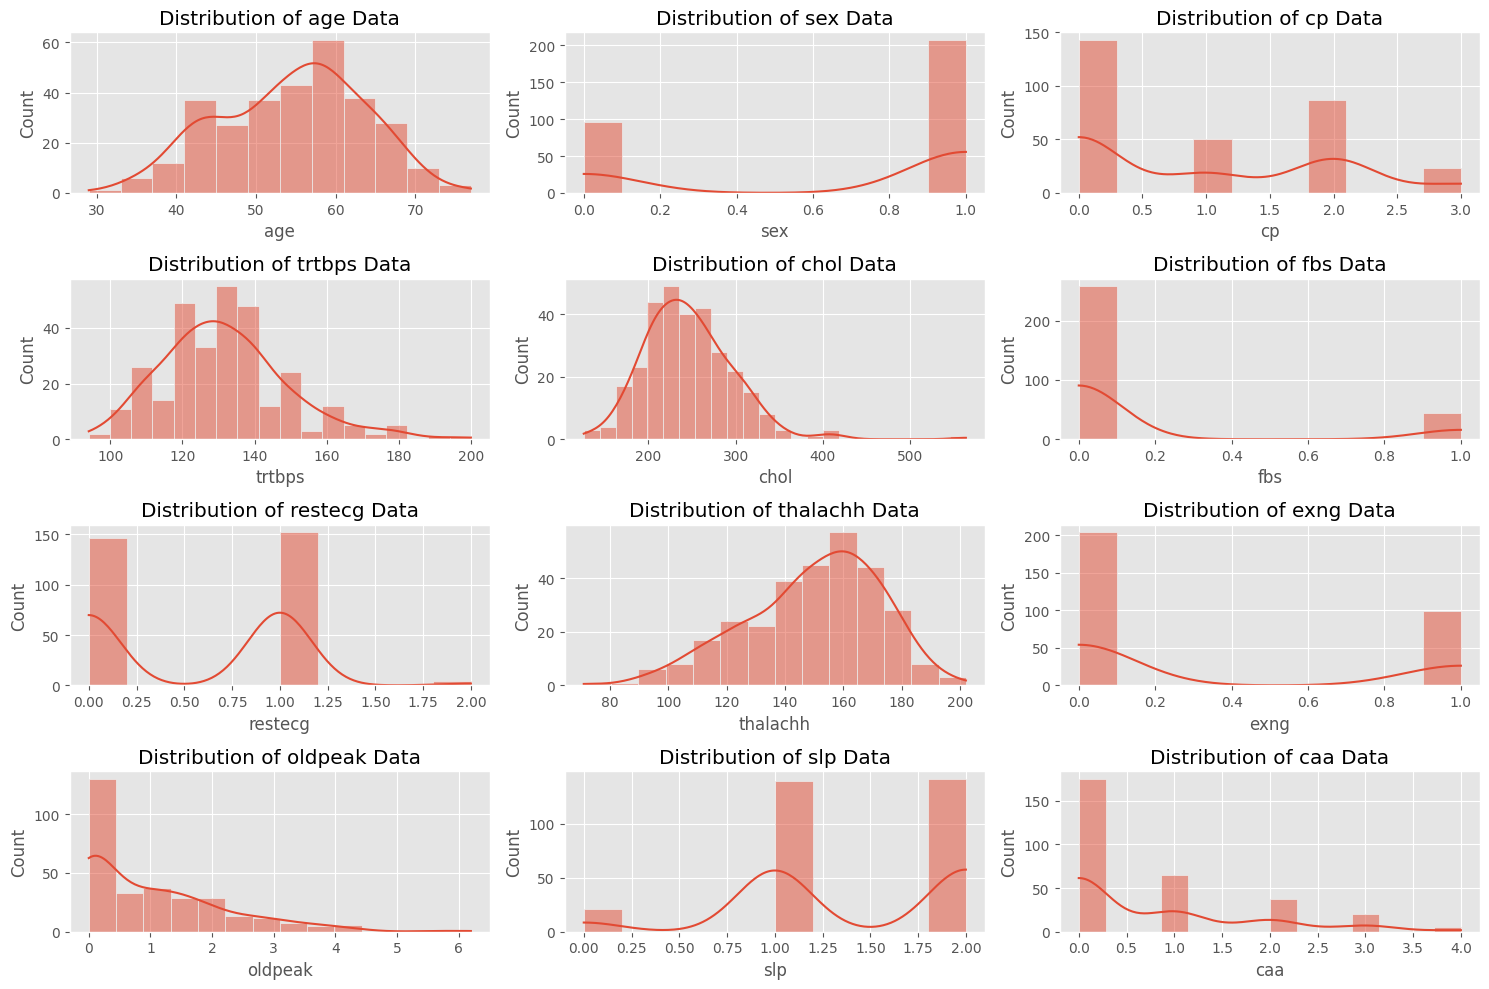

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns[:-2],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()



# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [ ]:
fig = px.box(df,y="age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="trtbps",x="HeartDisease",title=f"Distrubution of RestingBP",color="sex")
fig.show()

In [ ]:
fig = px.box(df,y="chol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="thalachh",x="HeartDisease",title=f"Distrubution of maximum heart rate")
fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that we will cover in this case study are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

# 1. Handling Null Values :
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.


In [ ]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking for NULLs in the data
df.isnull().sum()

age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
HeartDisease    0
dtype: int64

So we can see our data does not have any null values
but in case we have missing values, we can remove the data as well.

However, it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss. If you have 300K data points then removing 2–3 rows won’t affect your dataset much but if you only have 100 data points and out of which 20 have NaN values for a particular field then you can’t simply drop those rows. In real-world datasets, it can happen quite often that you have a large number of NaN values for a particular field.
Ex — Suppose we are collecting the data from a survey, then it is possible that there could be an optional field which let’s say 20% of people left blank. So when we get the dataset then we need to understand that the remaining 80% of data is still useful, so rather than dropping these values we need to somehow substitute the missing 20% values. We can do this with the help of Imputation.

### Imputation:

Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.

For example :

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['Weight']])
df['Weight'] = imputer.transform(df[['Weight']])

```

### As we do not have any missing data so we will not be using this approch

# 2. Feature Scaling


### Why Should we Use Feature Scaling?

The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.

## 1. Distance Based Algorithms :
    
Distance algorithms like **"KNN"**, **"K-means"** and **"SVM"** are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.
Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

<img src="https://miro.medium.com/max/1000/0*MZKG8sTIdSNv6TXB" width=50%>


## 2. Tree-Based Algorithms :

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

<img src="https://miro.medium.com/max/925/0*U0rcW7XrdHpvI0hU.jpeg" width=70%>

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization :

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

## The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.

### Robust Scaler
When working with outliers we can use Robust Scaling for scakling our data,
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.
RobustScaler uses the interquartile range so that it is robust to outliers

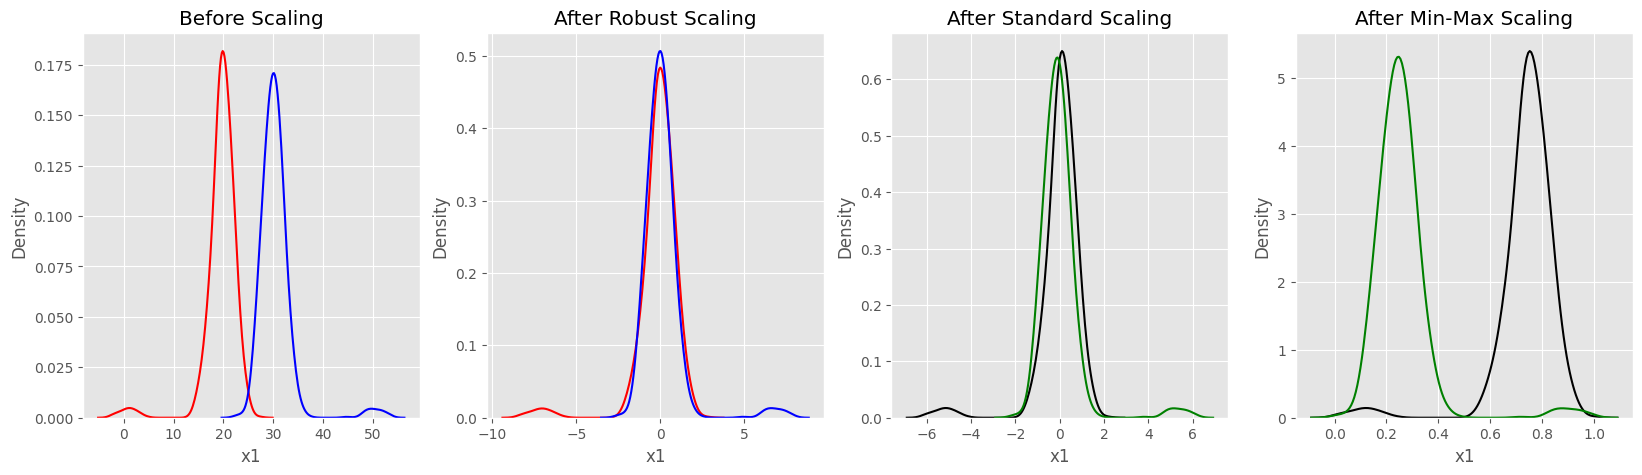

In [ ]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

# 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :
- Label Encoding
```python
from sklearn.preprocessing import LabelEncoder
```
- One Hot Encoding
```python
pd.get_dummies()
```

but we need to understand where to use which type of label encoding:

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**
- One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.
- The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

In [ ]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartDisease
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1


We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model
    - XGBoost
    - GBM
    - LightGBM
    
This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data.
As shown bellow :

In [ ]:
## Creaeting one hot encoded features for working with non tree based algorithms
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Chossing the right Cross-Validation

Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used.
These include:

- k-fold cross-validation
- stratified k-fold cross-validation
Cross-validation is dividing training data into a few parts. We train the model on some of these parts and test on the remaining parts
<br>

<img src="https://i.stack.imgur.com/8uEci.png" width=50%>
<br>

## 1. K-fold cross-validation :

As you can see, we divide the samples and the targets associated with them. We can divide the data into k different sets which are exclusive of each other. This is known as k-fold cross-validation, We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.

## 2. Stratified k-fold cross-validation :

If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.



# Training our Machine Learning Model :


# NON-TREE BASED ALGORITHMS

<img src="https://media.giphy.com/media/zMukICnMEZmSf8zvXd/giphy.gif">

So as have talked earlier we have to use differnt ways to works with categorical data, so we will be using different methods:

## 1.Using Logistic Regression :

It is a binary classification problem:
the target here is **not skewed** but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

Logistic regression, is an (binary) extension to Linear Regression and is used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.


In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)


    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

The accuracy for Fold 1 : 0.8268398268398269
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

The accuracy for Fold 2 : 0.8501082251082251
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                       

# Choosing the best Evaluation Matrix:

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):
    - If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
    - AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about

- Log loss
    > Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem

- **Mcro averaged precision**: calculate precision for all classes individually and then average them
- **Micro averaged precision**: calculate class wise true positive and false positive and then use that to calculate overall precision
- **Weighted precision**: same as macro but in this case, it is weighted average depending on the number of items in each class

<img src="https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png">


# Further Readings if interested!!!!

I have created these notebooks as well for anyone who is intereseted in learning new things in the domain of machine learning application. Please refer to them if interested.😁

- Notebook : Automating the Machine Learning workflow using [AutoXGB : XGBoost + Optuna](https://www.kaggle.com/durgancegaur/autoxgb-xgboost-optuna-score-0-95437-dec)
- Notebook : [Working with CatBoost](https://www.kaggle.com/durgancegaur/tps-dec-hyperp-tuning-catboost-score-0-95451)
- Notebook : Working with data imbalance and [upsampling of data SMOTE](https://www.kaggle.com/durgancegaur/working-with-data-imbalance-eda-99-auc)
- Notebook : Working wtih [H2OAuoML](https://www.kaggle.com/durgancegaur/eda-and-working-with-h2oautoml)
